<a href="https://colab.research.google.com/github/KinzaAslam/DSA_20SW071/blob/main/DarazDatasetAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("smartphones.csv")

# Data Exploration
print(data.head())

   Unnamed: 0                                        product url  \
0           0  https://www.daraz.pk/products/poco-m3-4gb-ram-...   
1           1  https://www.daraz.pk/products/samsung-m51-67-s...   
2           2  https://www.daraz.pk/products/samsung-m31-64-s...   
3           3  https://www.daraz.pk/products/samsung-m31s-65-...   
4           4  https://www.daraz.pk/products/redmi-note-10-4g...   

                                       product title       price reviews  \
0  Poco M3 - 4GB RAM - 64GB ROM - 6000mAh High ca...  Rs. 25,999  (1139)   
1  Samsung M51 - 6.7" sAMOLED  Plus Display - 64M...  Rs. 61,999   (358)   
2  Samsung M31 - 6.4" Super AMOLED Display - 6GB ...  Rs. 44,999   (938)   
3  Samsung M31s - 6.5" Infinity O Display - 64MP ...  Rs. 47,999   (318)   
4  Redmi Note 10 (4GB+128GB) -  48MP Quad camera ...  Rs. 31,999    (60)   

   rating  
0     4.9  
1     4.6  
2     4.6  
3     4.9  
4     4.9  


In [ ]:
!ls

sample_data


In [ ]:
file_path = "smartphones.csv"

try:
    with open(file_path, "r") as f:
        pass
except FileNotFoundError:
    print(f"File not found at path: {file_path}")

File not found at path: smartphones.csv


In [ ]:
!ls -l smartphones.csv

ls: cannot access 'smartphones.csv': No such file or directory


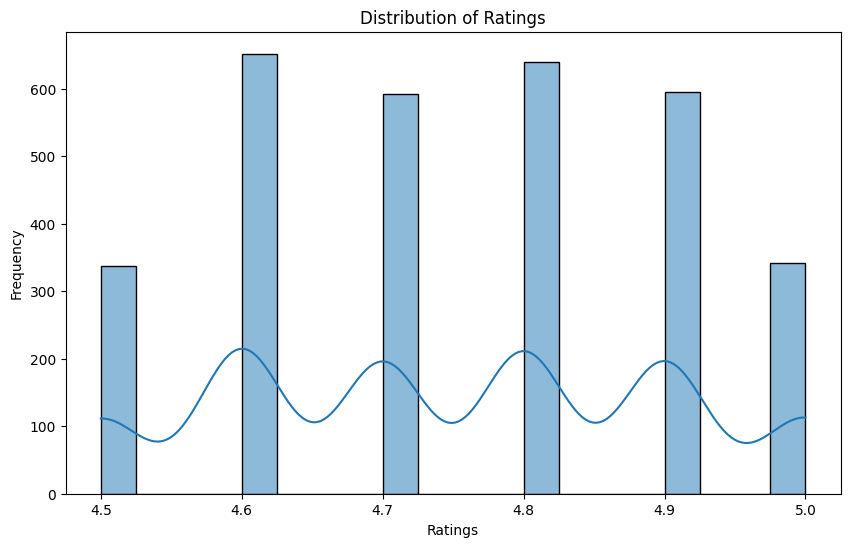

In [ ]:
# Graph for Ratings
plt.figure(figsize=(10, 6))
sns.histplot(data['rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()


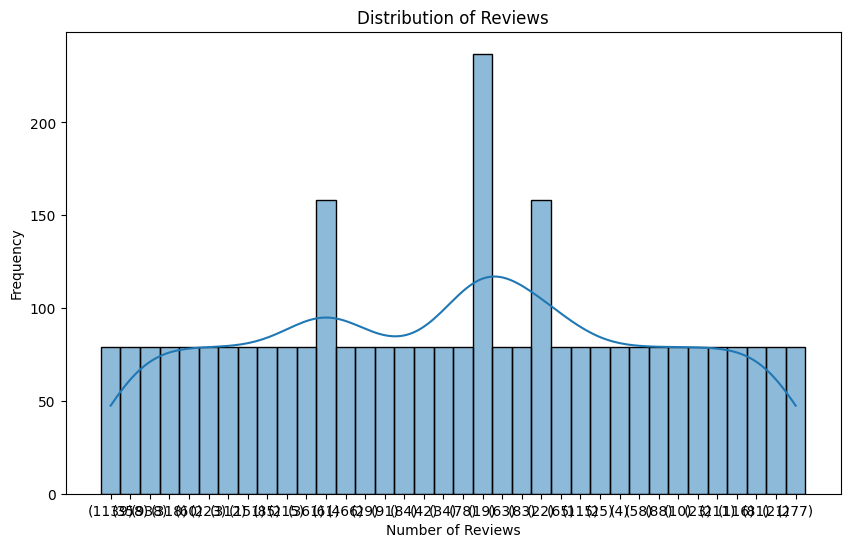

In [ ]:
# Graph for Reviews
plt.figure(figsize=(10, 6))
sns.histplot(data['reviews'], bins=20, kde=True)
plt.title('Distribution of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.show()


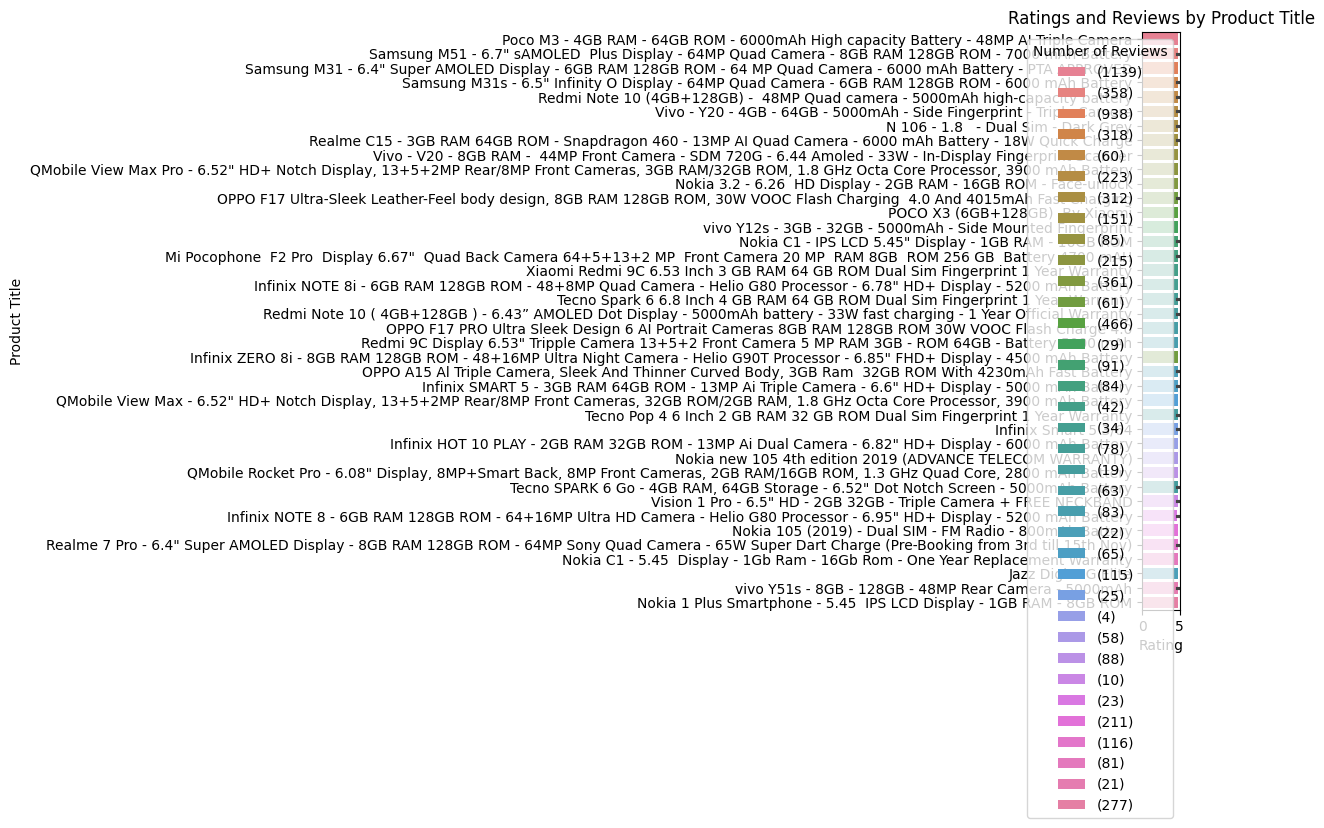

In [ ]:
# Data Visualization
plt.figure(figsize=(12, 8))
sns.barplot(data=data, x='rating', y='product title', hue='reviews')
plt.title('Ratings and Reviews by Product Title')
plt.xlabel('Rating')
plt.ylabel('Product Title')
plt.legend(title='Number of Reviews')
plt.tight_layout()
plt.show()

   Unnamed: 0                                        product url  \
0           0  https://www.daraz.pk/products/poco-m3-4gb-ram-...   
1           1  https://www.daraz.pk/products/samsung-m51-67-s...   
2           2  https://www.daraz.pk/products/samsung-m31-64-s...   
3           3  https://www.daraz.pk/products/samsung-m31s-65-...   
4           4  https://www.daraz.pk/products/redmi-note-10-4g...   

                                       product title       price reviews  \
0  Poco M3 - 4GB RAM - 64GB ROM - 6000mAh High ca...  Rs. 25,999  (1139)   
1  Samsung M51 - 6.7" sAMOLED  Plus Display - 64M...  Rs. 61,999   (358)   
2  Samsung M31 - 6.4" Super AMOLED Display - 6GB ...  Rs. 44,999   (938)   
3  Samsung M31s - 6.5" Infinity O Display - 64MP ...  Rs. 47,999   (318)   
4  Redmi Note 10 (4GB+128GB) -  48MP Quad camera ...  Rs. 31,999    (60)   

   rating  
0     4.9  
1     4.6  
2     4.6  
3     4.9  
4     4.9  


<ipython-input-23-9aac86d447de>:23: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


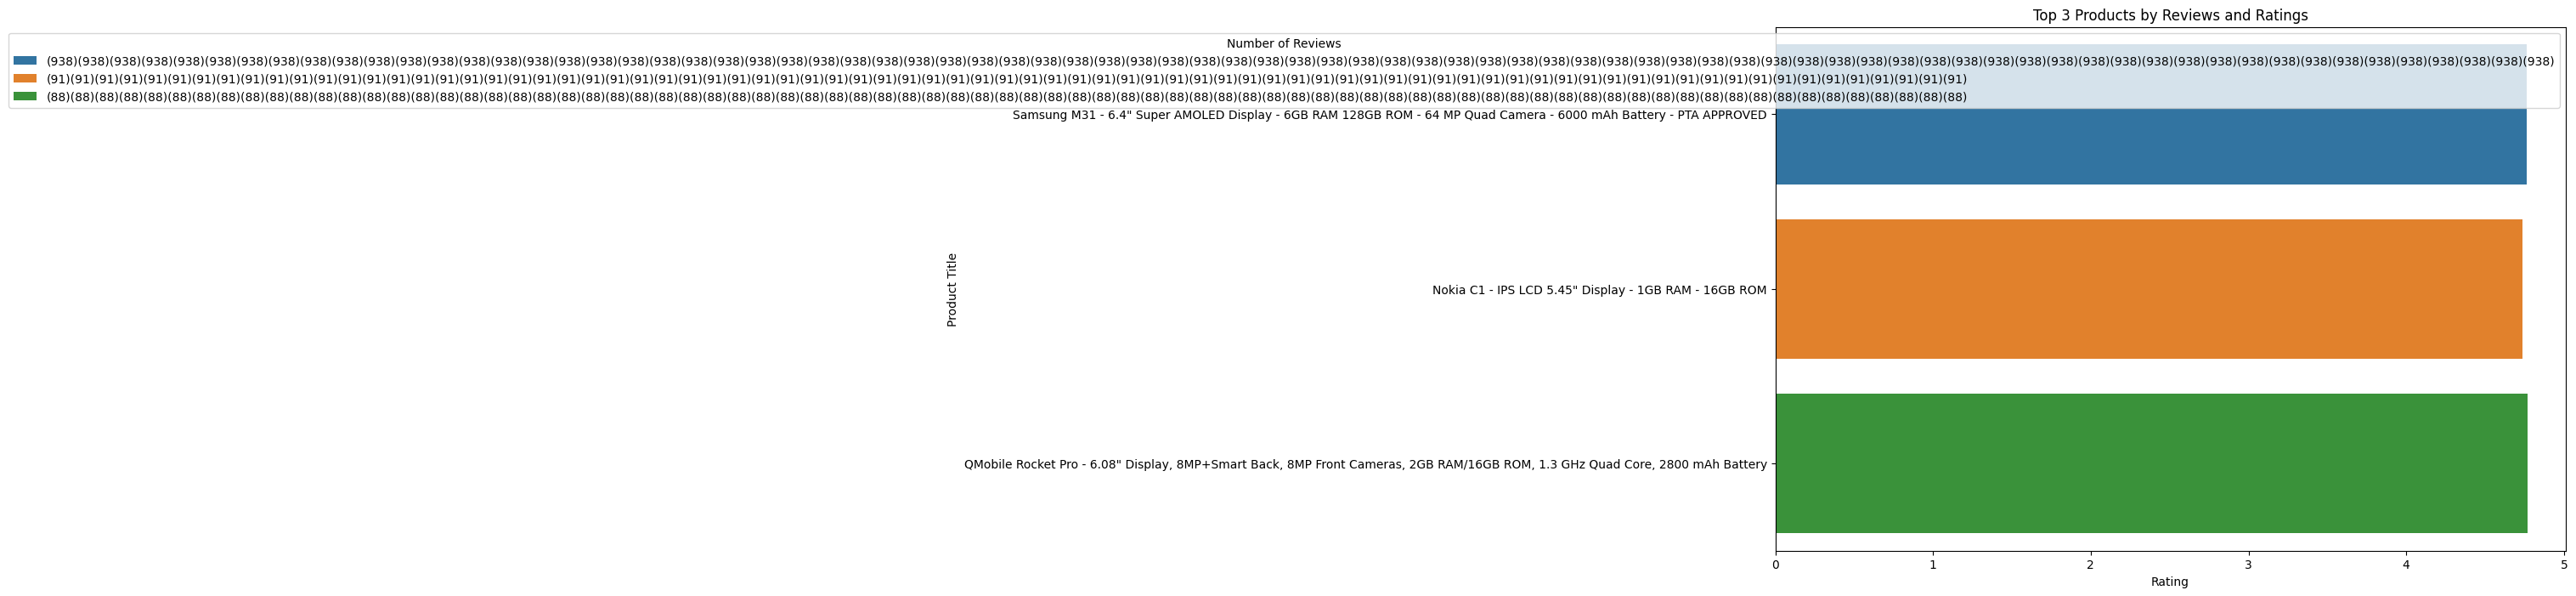

In [ ]:
print(data.head())

# Calculate total reviews for each product
total_reviews = data.groupby('product title')['reviews'].sum().reset_index()

# Calculate average ratings for each product
avg_ratings = data.groupby('product title')['rating'].mean().reset_index()

# Merge total reviews and average ratings
product_metrics = pd.merge(total_reviews, avg_ratings, on='product title')

# Sort products by total reviews or average ratings (choose one)
sorted_products = product_metrics.sort_values(by='reviews', ascending=False).head(3)
# sorted_products = product_metrics.sort_values(by='rating', ascending=False).head(3)

# Data Visualization
plt.figure(figsize=(12, 8))
sns.barplot(data=sorted_products, x='rating', y='product title', hue='reviews')
plt.title('Top 3 Products by Reviews and Ratings')
plt.xlabel('Rating')
plt.ylabel('Product Title')
plt.legend(title='Number of Reviews')
plt.tight_layout()
plt.show()

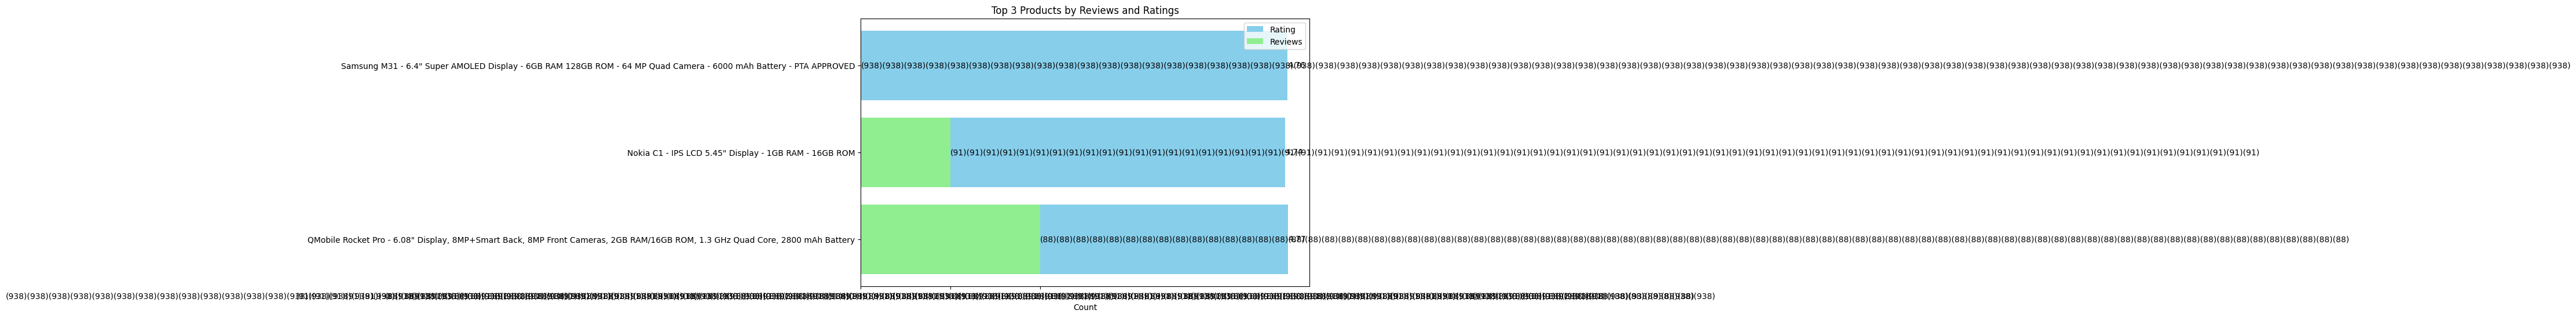

In [ ]:
# Calculate total reviews for each product
total_reviews = data.groupby('product title')['reviews'].sum().reset_index()

# Calculate average ratings for each product
avg_ratings = data.groupby('product title')['rating'].mean().reset_index()

# Merge total reviews and average ratings
product_metrics = pd.merge(total_reviews, avg_ratings, on='product title')

# Sort products by total reviews or average ratings (choose one)
top_three_reviews = product_metrics.sort_values(by='reviews', ascending=False).head(3)
# top_three_ratings = product_metrics.sort_values(by='rating', ascending=False).head(3)

# Plotting
plt.figure(figsize=(10, 6))

# Plotting the bars for ratings
plt.barh(top_three_reviews['product title'], top_three_reviews['rating'], color='skyblue', label='Rating')

# Adding text annotations for ratings
for i, v in enumerate(top_three_reviews['rating']):
    plt.text(v, i, str(round(v, 2)), va='center')

# Plotting the bars for reviews
plt.barh(top_three_reviews['product title'], top_three_reviews['reviews'], color='lightgreen', label='Reviews')

# Adding text annotations for reviews
for i, v in enumerate(top_three_reviews['reviews']):
    plt.text(v, i, str(v), va='center')

plt.xlabel('Count')
plt.title('Top 3 Products by Reviews and Ratings')
plt.legend()
plt.gca().invert_yaxis()  # Invert y-axis to display the highest count at the top
plt.show()

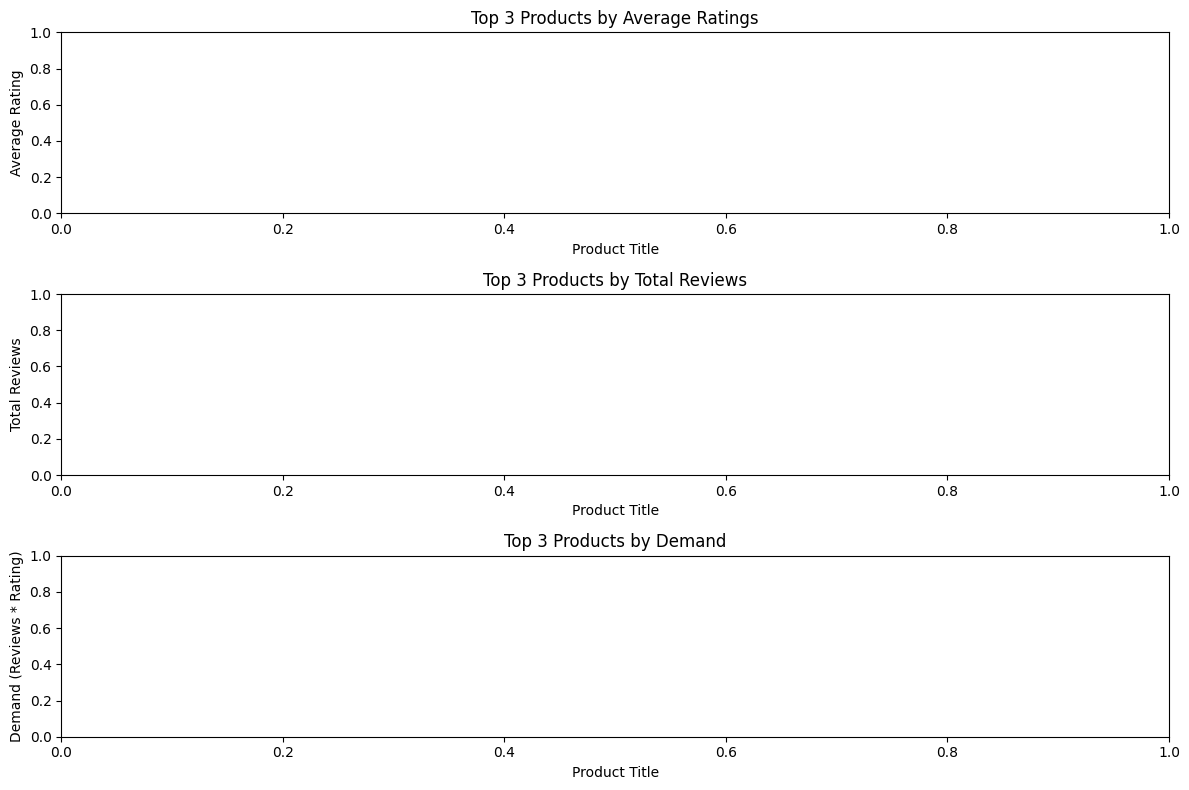

In [ ]:
# Convert 'reviews' column to numeric and handle missing values
data['reviews'] = pd.to_numeric(data['reviews'], errors='coerce')

# Convert 'rating' column to numeric and handle missing values
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')

# Remove rows with missing values in 'reviews' or 'rating' columns
data.dropna(subset=['reviews', 'rating'], inplace=True)

# Group by product title and calculate total reviews and average ratings
product_stats = data.groupby('product title').agg({
    'reviews': 'sum',
    'rating': 'mean'
}).reset_index()

# Calculate demand as a combination of reviews and ratings
product_stats['demand'] = product_stats['reviews'] * product_stats['rating']

# Sort products by demand
top_three_demand = product_stats.sort_values(by='demand', ascending=False).head(3)

# Plotting
plt.figure(figsize=(12, 8))

# Plotting ratings trends
plt.subplot(3, 1, 1)
sns.barplot(data=top_three_demand, x='product title', y='rating', palette='viridis')
plt.title('Top 3 Products by Average Ratings')
plt.xlabel('Product Title')
plt.ylabel('Average Rating')

# Plotting reviews trends
plt.subplot(3, 1, 2)
sns.barplot(data=top_three_demand, x='product title', y='reviews', palette='magma')
plt.title('Top 3 Products by Total Reviews')
plt.xlabel('Product Title')
plt.ylabel('Total Reviews')

# Plotting demand trends
plt.subplot(3, 1, 3)
sns.barplot(data=top_three_demand, x='product title', y='demand', palette='rocket')
plt.title('Top 3 Products by Demand')
plt.xlabel('Product Title')
plt.ylabel('Demand (Reviews * Rating)')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv("smartphones.csv")

# Inspect the first few rows of the dataset
print(data.head())

# Check basic information about the dataset
print(data.info())

# Check for missing values
print(data.isnull().sum())


   Unnamed: 0                                        product url  \
0           0  https://www.daraz.pk/products/poco-m3-4gb-ram-...   
1           1  https://www.daraz.pk/products/samsung-m51-67-s...   
2           2  https://www.daraz.pk/products/samsung-m31-64-s...   
3           3  https://www.daraz.pk/products/samsung-m31s-65-...   
4           4  https://www.daraz.pk/products/redmi-note-10-4g...   

                                       product title       price reviews  \
0  Poco M3 - 4GB RAM - 64GB ROM - 6000mAh High ca...  Rs. 25,999  (1139)   
1  Samsung M51 - 6.7" sAMOLED  Plus Display - 64M...  Rs. 61,999   (358)   
2  Samsung M31 - 6.4" Super AMOLED Display - 6GB ...  Rs. 44,999   (938)   
3  Samsung M31s - 6.5" Infinity O Display - 64MP ...  Rs. 47,999   (318)   
4  Redmi Note 10 (4GB+128GB) -  48MP Quad camera ...  Rs. 31,999    (60)   

   rating  
0     4.9  
1     4.6  
2     4.6  
3     4.9  
4     4.9  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3160 entries

In [ ]:
if product_stats.empty:
    print("No data available to plot.")
else:
    # Calculate demand as a combination of reviews and ratings
    product_stats['demand'] = product_stats['reviews'] * product_stats['rating']

    # Sort products by demand
    top_product = product_stats.sort_values(by='demand', ascending=False).head(1)

    # Plotting
    plt.figure(figsize=(10, 6))

    # Define metrics and their corresponding values
    metrics = ['Average Rating', 'Total Reviews', 'Demand']
    values = [top_product['rating'].values[0], top_product['reviews'].values[0], top_product['demand'].values[0]]

    # Plot the bar plot
    sns.barplot(x=metrics, y=values, palette='muted')

    plt.title('Metrics for Top Product: ' + top_product['product title'].values[0])
    plt.xlabel('Metric')
    plt.ylabel('Count')

    plt.tight_layout()
    plt.show()


No data available to plot.


In [1]:
import itertools
import statsmodels.api as sm

# Define the range of p, d, and q values to search
p_values = range(0, 3)  # Adjust as needed
d_values = range(0, 2)  # Adjust as needed
q_values = range(0, 3)  # Adjust as needed

# Generate all possible combinations of p, d, and q values
pdq = list(itertools.product(p_values, d_values, q_values))

# Initialize variables to store best parameters and lowest AIC
best_aic = float("inf")
best_params = None

# Iterate through each combination of parameters
for param in pdq:
    try:
        # Fit ARIMA model with current parameters
        model = sm.tsa.ARIMA(train, order=param)
        results = model.fit()

        # Check if current AIC is lower than the best AIC
        if results.aic < best_aic:
            best_aic = results.aic
            best_params = param
    except:
        continue

print("Best Parameters:", best_params)
print("Lowest AIC:", best_aic)


Best Parameters: None
Lowest AIC: inf


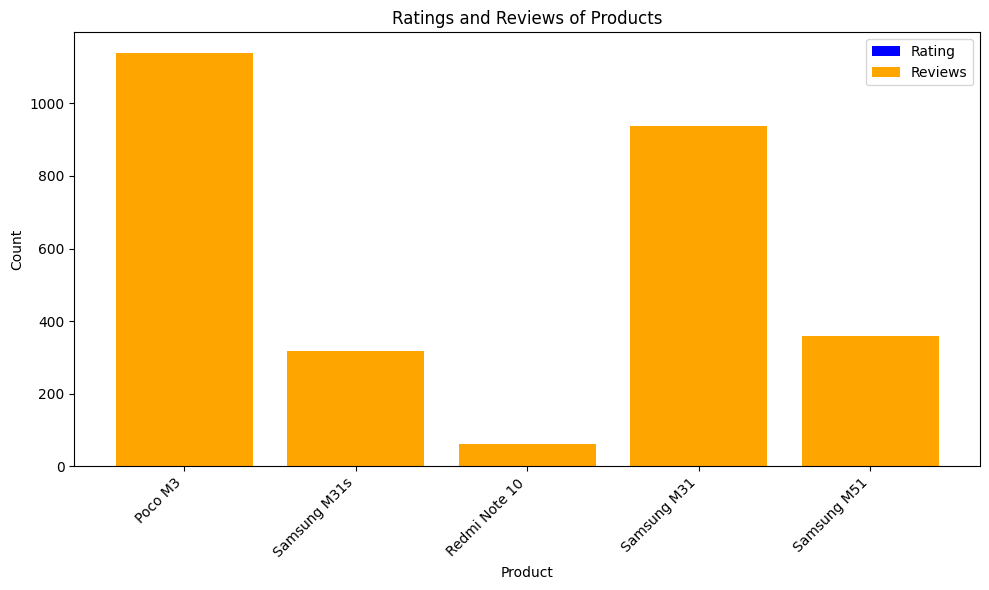

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with the provided data
data = {
    'product': [
        "Poco M3",
        "Samsung M51",
        "Samsung M31",
        "Samsung M31s",
        "Redmi Note 10"
    ],
    'price': [
        25999,
        61999,
        44999,
        47999,
        31999
    ],
    'reviews': [
        1139,
        358,
        938,
        318,
        60
    ],
    'rating': [
        4.9,
        4.6,
        4.6,
        4.9,
        4.9
    ]
}

df = pd.DataFrame(data)

# Sort the DataFrame by rating and reviews in descending order
df_sorted = df.sort_values(by=['rating', 'reviews'], ascending=False)

# Plot the ratings and reviews of the products
plt.figure(figsize=(10, 6))
plt.bar(df_sorted['product'], df_sorted['rating'], color='blue', label='Rating')
plt.bar(df_sorted['product'], df_sorted['reviews'], color='orange', label='Reviews')
plt.xlabel('Product')
plt.ylabel('Count')
plt.title('Ratings and Reviews of Products')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
